## PyTorch Autograd

Autograd is now a core torch package for automatic differentiation. It uses a tape based system for automatic differentiation.

In the forward phase, the autograd tape will remember all the operations it executed, and in the backward phase, it will replay the operations.

In autograd, if any input Tensor of an operation has requires_grad=True, the computation will be tracked. After computing the backward pass, a gradient w.r.t. this tensor is accumulated into .grad attribute.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [2]:
#Initialize tensors a & b
a = torch.tensor([5.], requires_grad = True)
b = torch.tensor([6.], requires_grad = True)

In [3]:
# a and b are defined and we can check.
a

tensor([5.], requires_grad=True)

In [4]:
b

tensor([6.], requires_grad=True)

In [5]:
#Define a function y in terms of a and b
y = a**3 - b**2

In [6]:
#Check y
print(y)

tensor([89.], grad_fn=<SubBackward0>)


During back propagation, we may need to find the partial derivative of y with respect to a and b respectively.

If we calculate the partial derivatives, it may look like following:

dy/da = 3.a^2 = 75

dy/db = -2.b = -12

In pytorch, we can compute this automatically.

First, let's observe the grad attribute for a and b.

In [7]:
print(a.grad)

None


In [8]:
print(b.grad)

None


We can see that "a.grad" and "b.grad" is None. This is because we have not performed backward propagation till now. Another important point is ".grad" attribute exists only if we have set "requires_grad = True".

Let's do backward propagation.

In [9]:
y.backward()

Now, if we look at values of "a.grad" and "b.grad", we can get the gradient values.

In [10]:
print(a.grad)

tensor([75.])


In [11]:
print(b.grad)

tensor([-12.])


In [12]:
#################------EXAMPLE------#################

In [13]:
#Initialize a random vector W ('For Weights')
W = torch.randn(10, 1, requires_grad = True)

#Initialize another random vector b ('For bias')
b = torch.randn(1, requires_grad = True)

In [14]:
W

tensor([[-0.4006],
        [ 0.5031],
        [ 0.7388],
        [-1.3426],
        [-0.7654],
        [ 0.2890],
        [ 0.5834],
        [-0.7407],
        [-1.1290],
        [-0.0162]], requires_grad=True)

In [15]:
b

tensor([1.4956], requires_grad=True)

In [16]:
#Initialize x ('For Features')
x = torch.rand(1, 10)

In [17]:
x

tensor([[0.8196, 0.4267, 0.1205, 0.6585, 0.8084, 0.2857, 0.9630, 0.3658, 0.1606,
         0.7902]])

Let's perform a simple linear regression

In [18]:
output = torch.matmul(x, W) + b

In [19]:
output

tensor([[0.1473]], grad_fn=<AddBackward0>)

In [20]:
loss = 1 - output

In [21]:
loss

tensor([[0.8527]], grad_fn=<RsubBackward1>)

In [22]:
loss.backward()

In [23]:
W.grad

tensor([[-0.8196],
        [-0.4267],
        [-0.1205],
        [-0.6585],
        [-0.8084],
        [-0.2857],
        [-0.9630],
        [-0.3658],
        [-0.1606],
        [-0.7902]])

In [24]:
b.grad

tensor([-1.])

In [25]:
#Updating weights 
with torch.no_grad():
    W = W - 0.001 * W.grad.data

In [26]:
W

tensor([[-0.3998],
        [ 0.5035],
        [ 0.7389],
        [-1.3420],
        [-0.7646],
        [ 0.2893],
        [ 0.5844],
        [-0.7403],
        [-1.1288],
        [-0.0154]])

### More on Autograd

In [27]:
#Create two new tensors without "requires_grad = True"
a = torch.tensor(2.0)
b = torch.tensor(3.0)

In [28]:
a

tensor(2.)

In [29]:
b

tensor(3.)

|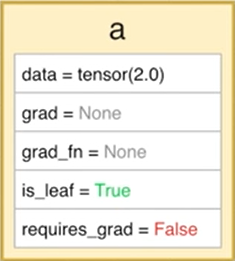 | 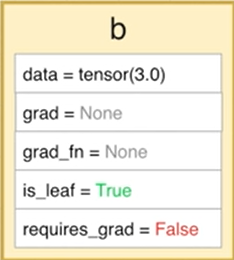|
|-|-|

For both tensors a & b, we have some basic attributes shown in the figure above.

***data*** attribute holds the data of the tensor.

***grad*** attribute holds the gradient value once it is calculated during backpropagation.

***grad_fn*** points to a node in backward graph.

***is_leaf*** which means that this tensor is the leaf of a graph if it is True.

***requires_grad*** is necessary to calculate gradient during backpropagation by generating backward graph.

For a & b, we can see that, ***requires_grad*** attribute is set to ***False***.

Let's perform multiplication between a and b and save it to another variable c.

In [30]:
#Multiply a and b
c = a * b

In [31]:
c

tensor(6.)

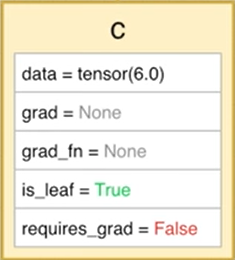

We can see that ***requires_grad*** attribute for the product is also ***False***.

Now, let's do some minor change and set the ***requires_grad*** attribute to ***True*** for a.

In [32]:
a = torch.tensor(2.0, requires_grad = True)

In [33]:
a

tensor(2., requires_grad=True)

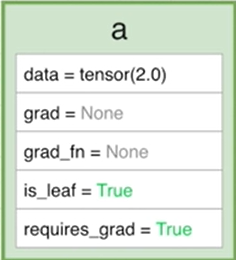

Here, we can see that for a, ***requires_grad*** attribute is set to ***True***. Now, let's perform the same operation.

In [34]:
c = a * b

In [35]:
c

tensor(6., grad_fn=<MulBackward0>)

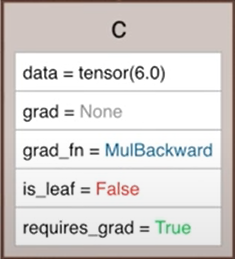

In [36]:
c.backward()

In [37]:
a.grad

tensor(3.)

 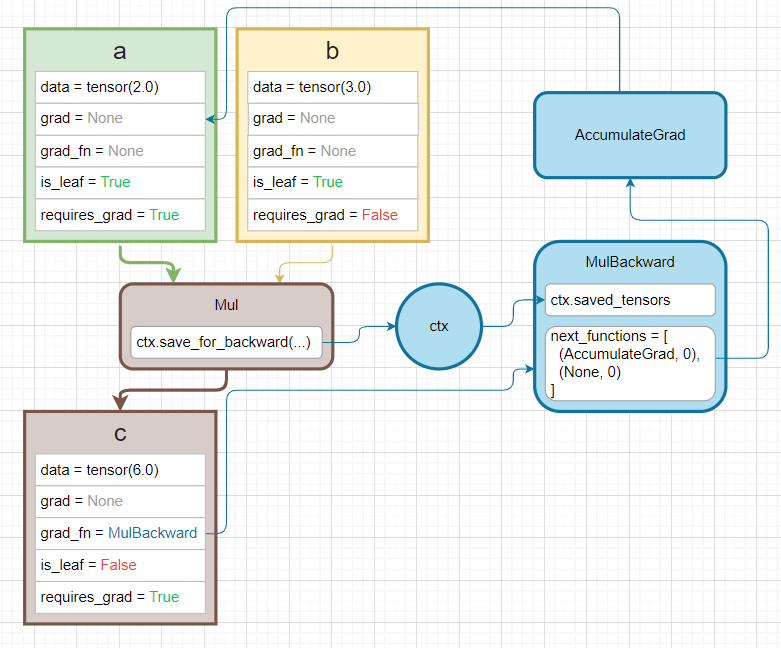

Again, let's try a more complex example.

In [38]:
a = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(3.0, requires_grad = True)

In [39]:
c = a * b

In [40]:
d = torch.tensor(4.0, requires_grad = True)

In [41]:
e = c * d

In [42]:
e.backward()

In [43]:
d.grad

tensor(6.)

In [44]:
b.grad

tensor(8.)

In [45]:
a.grad

tensor(12.)

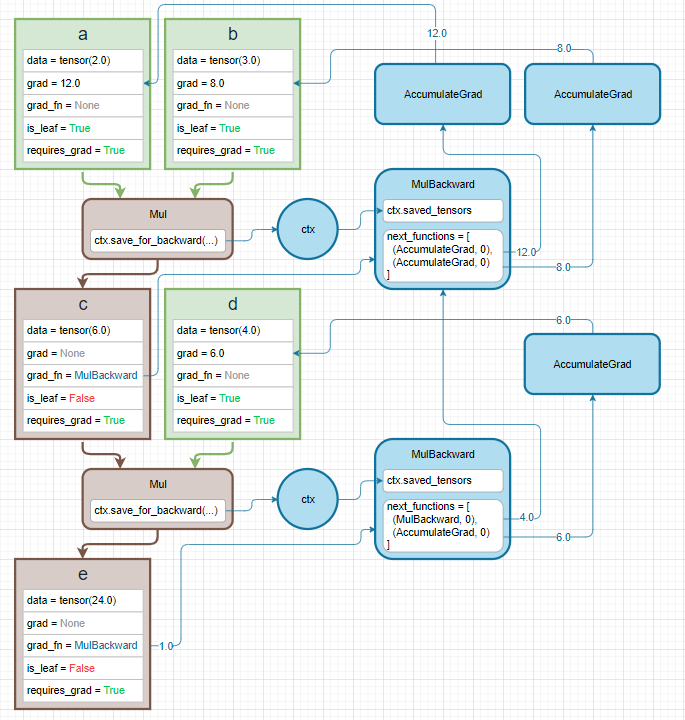